In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop    # Tối ưu
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical  # Sử dụng để làm nổi đối tượng cần phân loại
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pandas as pd
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import pickle
import math as m

In [ ]:
load_train_data='/content/drive/MyDrive/AI/MonAn'

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255,validation_split=0.2,rotation_range=10, 
                             zoom_range = 0.1,  
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             brightness_range=(0.9, 1.1))

In [ ]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset = 'training',
    shuffle = True
   )
validation_set=validation.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset = 'validation',
    shuffle = True
    )

Found 198 images belonging to 10 classes.
Found 38 images belonging to 10 classes.


In [ ]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'BanhDuc': 0, 'BanhHoi': 1, 'BanhMi': 2, 'Banhxeo': 3, 'Chao': 4, 'Com': 5, 'Mi': 6, 'MiQuang': 7, 'Pho': 8, 'Xoi': 9}
{'BanhDuc': 0, 'BanhHoi': 1, 'BanhMi': 2, 'Banhxeo': 3, 'Chao': 4, 'Com': 5, 'Mi': 6, 'MiQuang': 7, 'Pho': 8, 'Xoi': 9}


In [ ]:
drive.mount('/content/drive',force_remount=True)
banhduc_dir='/content/drive/MyDrive/AI/MonAn/BanhDuc'
banhhoi_dir='/content/drive/MyDrive/AI/MonAn/BanhHoi'
banhmi_dir='/content/drive/MyDrive/AI/MonAn/BanhMi'
banhxeo_dir='/content/drive/MyDrive/AI/MonAn/Banhxeo'
chao_dir='/content/drive/MyDrive/AI/MonAn/Chao'
com_dir='/content/drive/MyDrive/AI/MonAn/Com'
mi_dir='/content/drive/MyDrive/AI/MonAn/Mi'
miquang_dir='/content/drive/MyDrive/AI/MonAn/MiQuang'
pho_dir='/content/drive/MyDrive/AI/MonAn/Pho'
xoi_dir='/content/drive/MyDrive/AI/MonAn/Xoi'

banhduc_files = os.listdir(banhduc_dir)
print(banhduc_files[:20])

banhhoi_files = os.listdir(banhhoi_dir)
print(banhhoi_files[:20])

xoi_files = os.listdir(xoi_dir)
print(xoi_files[:20])

banhmi_files = os.listdir(banhmi_dir)
print(banhmi_files[:20])

banhxeo_files = os.listdir(banhxeo_dir)
print(banhxeo_files[:20])

chao_files = os.listdir(chao_dir)
print(chao_files[:20])

com_files = os.listdir(com_dir)
print(com_files[:20])

mi_files = os.listdir(mi_dir)
print(mi_files[:20])

miquang_files = os.listdir(miquang_dir)
print(miquang_files[:20])

pho_files = os.listdir(pho_dir)
print(pho_files[:20])

Mounted at /content/drive
['banh-duc-man.webp', 'images (10).jpg', 'images (9).jpg', 'images.jpg', 'images (1) (2).jpg', 'images (1) (1).jpg', 'images (1).jpg', 'images (2) (1).jpg', 'images (2).jpg', 'images (3) (1).jpg', 'images (3).jpg', 'images (4) (1).jpg', 'images (4).jpg', 'images (5) (1).jpg', 'images (5).jpg', 'images (6) (1).jpg', 'images (6).jpg', 'images (7) (1).jpg', 'images (7).jpg', 'images (8).jpg']
['images (12).jpg', 'images.jpg', 'images (1) (1).jpg', 'images (1).jpg', 'images (2) (1).jpg', 'images (2).jpg', 'images (3).jpg', 'images (4) (1).jpg', 'images (4).jpg', 'images (5) (1).jpg', 'images (5).jpg', 'images (6) (1).jpg', 'images (6).jpg', 'images (7) (1).jpg', 'images (7).jpg', 'images (8).jpg', 'images (9).jpg', 'images (10) (1).jpg', 'images (10).jpg', 'images (11).jpg']
['Cach-lam-xoi-xeo-de-ban-ngon-deo.jpg', 'images (8).jpg', 'images (7).jpg', 'images.jpg', 'images (1) (1).jpg', 'images (1).jpg', 'images (2) (2).jpg', 'images (2) (1).jpg', 'images (2).jpg',

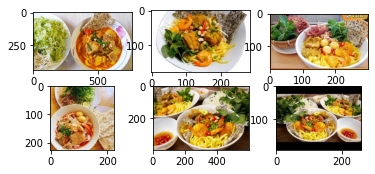

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/AI/MonAn/MiQuang/'
for i in range(6):
  plt.subplot(330+i+1)
  filename = folder + 'MiQuang' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
history=model.fit(train_data,batch_size=10,epochs=30,verbose=1,validation_data=validation_set)

Epoch 1/30
50/50 [==============================] - 126s 2s/step - loss: 5.7897 - accuracy: 0.0657 - val_loss: 2.2785 - val_accuracy: 0.2368
Epoch 2/30
50/50 [==============================] - 1s 28ms/step - loss: 2.2434 - accuracy: 0.3283 - val_loss: 2.2307 - val_accuracy: 0.2632
Epoch 3/30
50/50 [==============================] - 1s 27ms/step - loss: 2.1383 - accuracy: 0.4040 - val_loss: 2.2392 - val_accuracy: 0.1579
Epoch 4/30
50/50 [==============================] - 1s 27ms/step - loss: 1.8379 - accuracy: 0.4899 - val_loss: 2.1089 - val_accuracy: 0.2895
Epoch 5/30
50/50 [==============================] - 1s 27ms/step - loss: 1.0403 - accuracy: 0.7323 - val_loss: 1.9585 - val_accuracy: 0.3158
Epoch 6/30
50/50 [==============================] - 1s 28ms/step - loss: 0.2081 - accuracy: 0.9646 - val_loss: 3.4762 - val_accuracy: 0.1053
Epoch 7/30
50/50 [==============================] - 1s 27ms/step - loss: 0.0630 - accuracy: 0.9949 - val_loss: 1.3821 - val_accuracy: 0.5526
Epoch 8/30
50

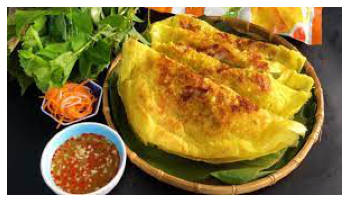

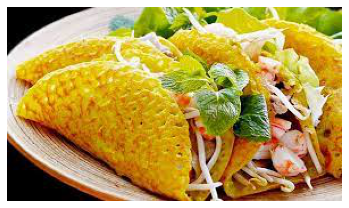

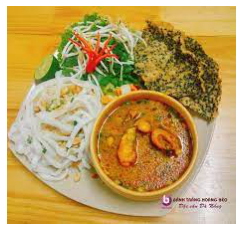

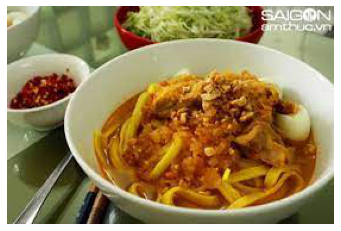

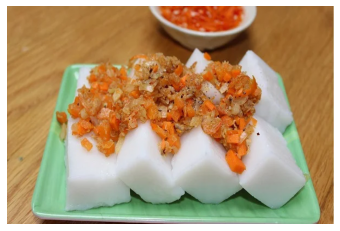

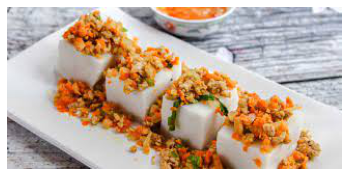

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dau = [os.path.join(banhxeo_dir, fname) 
                for fname in banhxeo_files[pic_index-2:pic_index]]
next_xoai = [os.path.join(miquang_dir, fname) 
                for fname in miquang_files[pic_index-2:pic_index]]
next_bo = [os.path.join(banhduc_dir, fname) 
                for fname in banhduc_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_dau+next_xoai+next_bo):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(499, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 49, 49, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 64)       

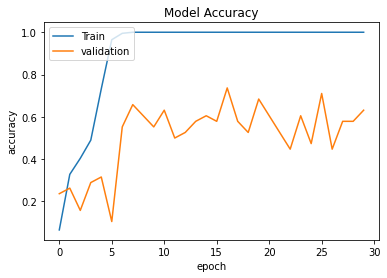

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AI/phanloaimonan.h5')

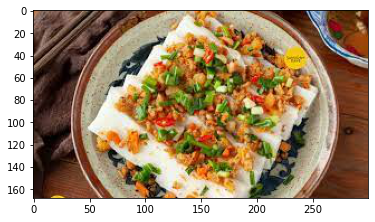

banhduc


In [ ]:
filename = '/content/drive/MyDrive/AI/TestMonAn/BanhDuc.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('banhduc')
elif kq ==1:
  print('banhhoi')
elif kq ==2:
  print('banhmi')
elif kq ==3:
  print('banhxeo')
elif kq ==4:
  print('chao')
elif kq ==5:
  print('com')
elif kq ==6:
  print('mi')
elif kq ==7:
  print('miquang')
elif kq ==8:
  print('pho')
elif kq ==9:
  print('xoi')

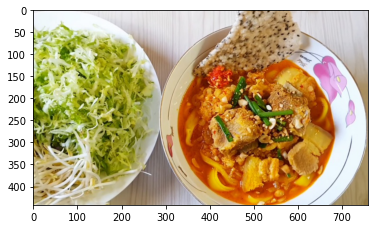

miquang


In [ ]:
filename = '/content/drive/MyDrive/AI/TestMonAn/MiQuang.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('banhduc')
elif kq ==1:
  print('banhhoi')
elif kq ==2:
  print('banhmi')
elif kq ==3:
  print('banhxeo')
elif kq ==4:
  print('miquang')
elif kq ==5:
  print('com')
elif kq ==6:
  print('mi')
elif kq ==7:
  print('chao')
elif kq ==8:
  print('pho')
elif kq ==9:
  print('xoi')